## Heart Failure Prediction

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
    data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
    data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
    data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
    data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
    #missing value
    
    data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
    data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
    #unique value analysis
    
    for i in list(data.columns):
        print("{}->{}".format(i,data[i].value_counts().shape[0]))

age->47
anaemia->2
creatinine_phosphokinase->208
diabetes->2
ejection_fraction->17
high_blood_pressure->2
platelets->176
serum_creatinine->40
serum_sodium->27
sex->2
smoking->2
time->148
DEATH_EVENT->2


In [10]:
    #categorical feature analysis
    
    categorical_list=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]


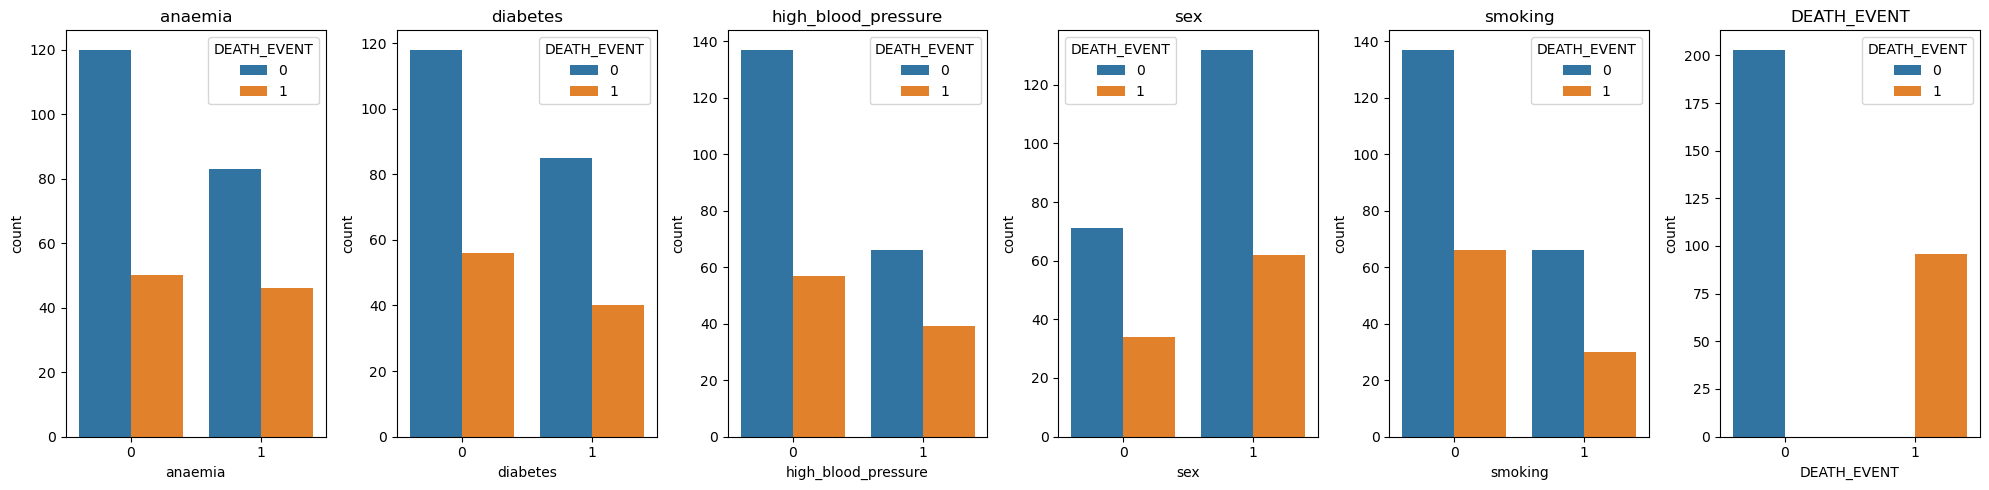

In [11]:
    import matplotlib.pyplot as plt
    import seaborn as sns

    data_categoric = data.loc[:, categorical_list]

    fig, axs = plt.subplots(ncols=len(categorical_list), figsize=(20,5))

    for i, col in enumerate(categorical_list):
        sns.countplot(x=col, data=data_categoric, hue="DEATH_EVENT", ax=axs[i])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show() 


In [12]:
    #numeric feature analysis
    
    numeric_list=["age", "creatinine_phosphokinase",
           "ejection_fraction", "platelets",
           "serum_creatinine", "serum_sodium", "time","DEATH_EVENT"]
       

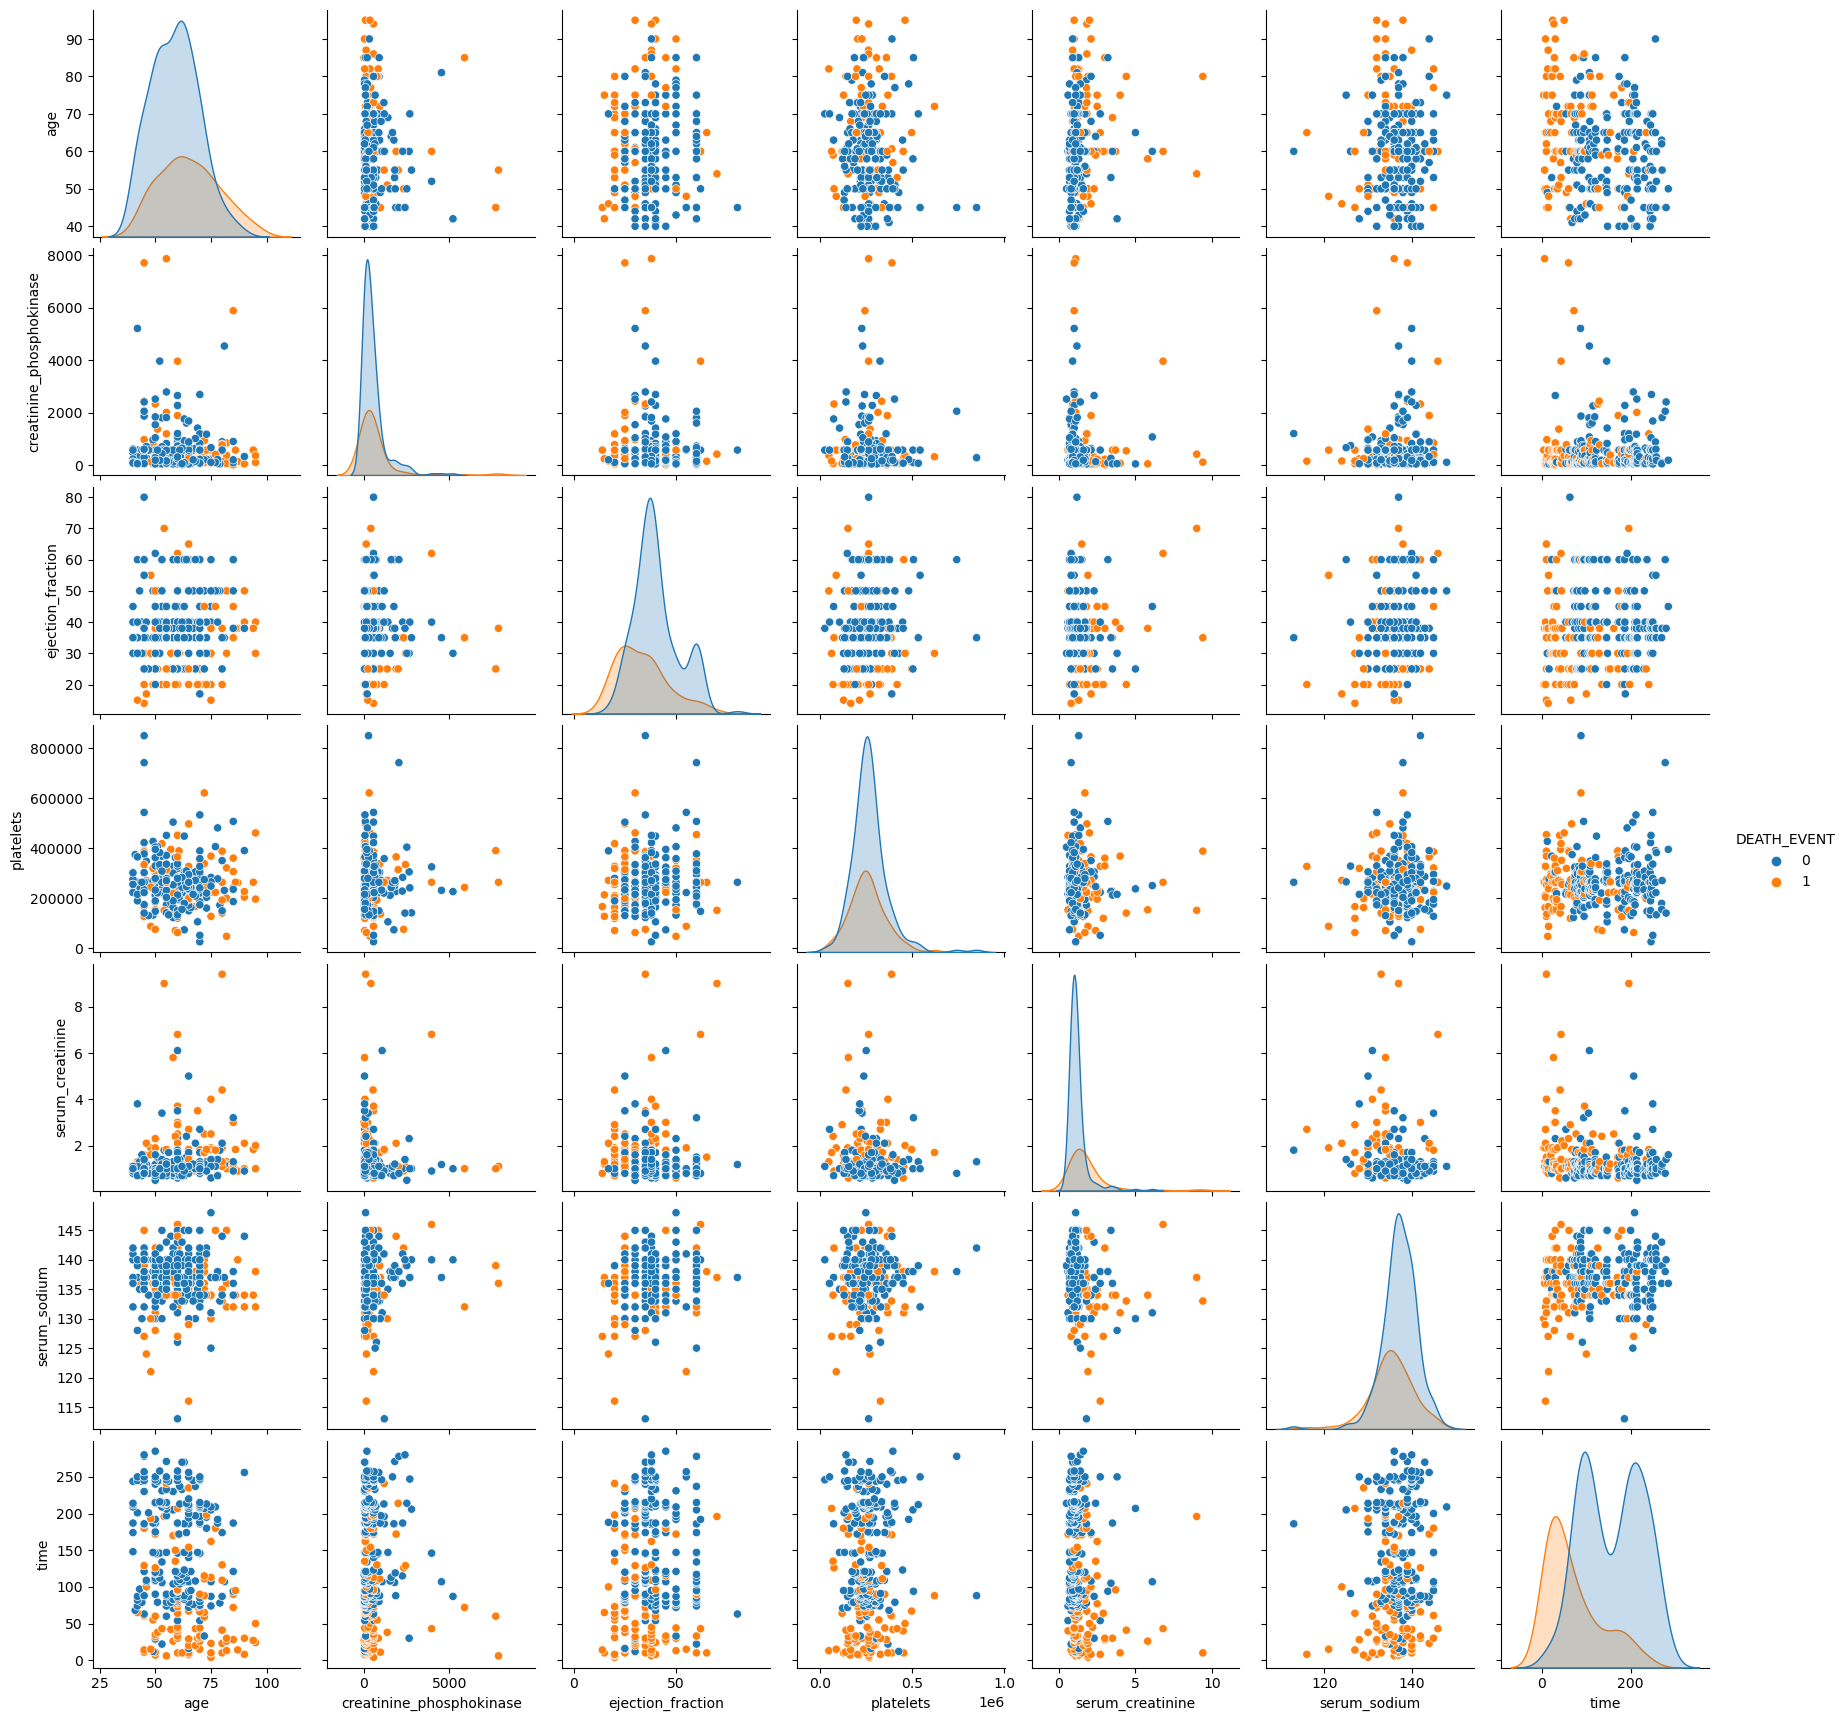

In [13]:
    data_numeric = data.loc[:, numeric_list]
    sns.pairplot(data_numeric, hue = "DEATH_EVENT", diag_kind = "kde")
    plt.show()


In [14]:
    #standardization
    
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaled_array=scaler.fit_transform(data[numeric_list[:-1]])


In [15]:
    pd.DataFrame(scaled_array).describe()

,0,1,2,3,4,5,6
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.265205e-16,3.713120e-18,3.341808e-18,1.009969e-16,-2.227872e-18,-8.627435e-16,-1.069379e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-5.769178e-01,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.629502e+00
25%,-8.281242e-01,-4.803931e-01,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01,-7.389995e-01
50%,-7.022315e-02,-3.425744e-01,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02,-1.969543e-01
75%,7.718891e-01,1.657284e-04,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01,9.387595e-01
max,2.877170e+00,7.514640e+00,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00,1.997038e+00


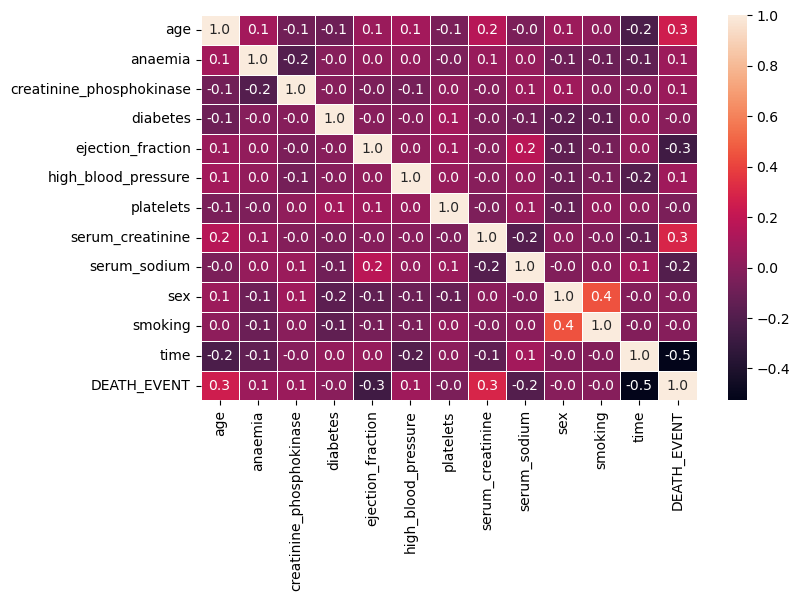

In [16]:
    #correlation analysis
    
    f,ax=plt.subplots(figsize = (8,5))
    sns.heatmap(data.corr(), annot = True, fmt = ".1f", linewidths = .5,ax=ax)
    plt.show()


In [17]:
    #encoding categorical columns
    
    data1=data.copy()
    data1= pd.get_dummies(data1, columns = categorical_list[:-1], drop_first = True)
    data1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,0,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0


In [18]:
    x_data = data1.drop(["DEATH_EVENT"], axis = 1)
    y = data1.DEATH_EVENT.values


In [19]:
    #normalization
    
    x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
    x

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0.0,0.0,1.0,1.0,0.0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0.0,0.0,0.0,1.0,0.0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0.0,0.0,0.0,1.0,1.0
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1.0,0.0,0.0,1.0,0.0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.004848,0.363636,0.157474,0.067416,0.857143,0.946619,0.0,1.0,1.0,1.0,1.0
295,0.272727,0.229268,0.363636,0.296884,0.078652,0.742857,0.950178,0.0,0.0,0.0,0.0,0.0
296,0.090909,0.259888,0.696970,0.869075,0.033708,0.714286,0.975089,0.0,1.0,0.0,0.0,0.0
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0.982206,0.0,0.0,0.0,1.0,1.0


In [20]:
    #train test split
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## K-Nearest Neighbors Classification (KNN)

In [21]:
    from sklearn.neighbors import KNeighborsClassifier

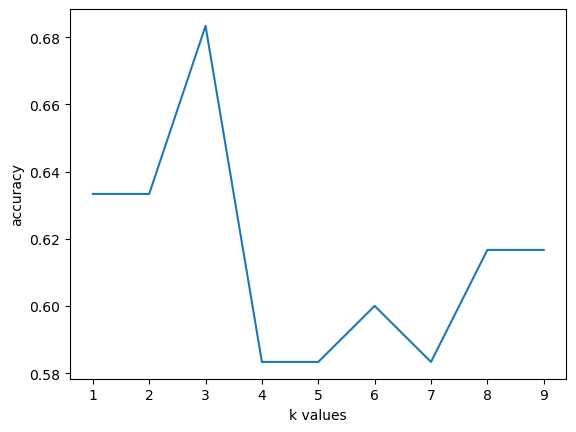

In [22]:
    #find k value
    score_list=[]
    for each in range(1,10):
        knn=KNeighborsClassifier(n_neighbors=each)
        knn.fit(x_train,y_train)
        score_list.append(knn.score(x_test,y_test))
        
    plt.plot(range(1,10),score_list)
    plt.xlabel("k values")
    plt.ylabel("accuracy")
    plt.show()

In [23]:
    #knn model
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_train,y_train)
    print("{} nn score:{}".format(3,knn.score(x_test,y_test)))

3 nn score:0.6833333333333333


In [24]:
    from sklearn.model_selection import cross_val_score

En uygun cv değeri: 8


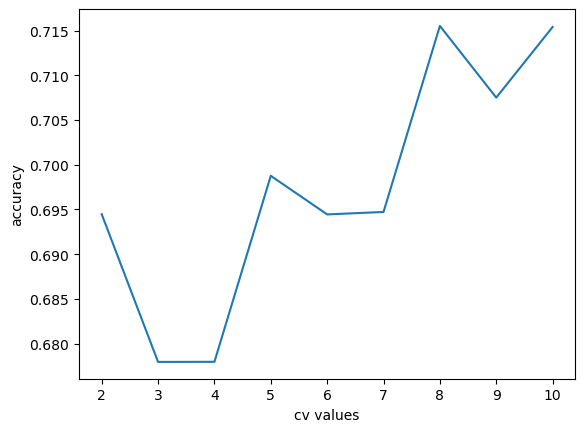

In [25]:
    # k fold cross validation with KNN
    
    score_list = []
    for cv in range(2, 11):
        knn_tuning = KNeighborsClassifier(n_neighbors=3)
        accuracies = cross_val_score(estimator=knn_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
    best_cv = np.argmax(score_list) + 2
    print("En uygun cv değeri:", best_cv)
    
    plt.plot(range(2,11),score_list)
    plt.xlabel("cv values")
    plt.ylabel("accuracy")
    plt.show()


In [26]:
    accuracies = cross_val_score(knn_tuning, X=x_train,y=y_train, cv=8)
    accuracies

array([0.63333333, 0.76666667, 0.7       , 0.66666667, 0.7       ,
       0.8       , 0.73333333, 0.72413793])

In [27]:
    accuracies = cross_val_score(knn_tuning, X=x_train,y=y_train, cv=8)
    print("mean_accuracy:", np.mean(accuracies))
    print("mean_std:",np.std(accuracies))
    knn_tuning.fit(x_train,y_train)
    print("test accuracy:",knn_tuning.score(x_test,y_test))

mean_accuracy: 0.7155172413793103
mean_std: 0.04970849095670971
test accuracy: 0.6833333333333333


In [28]:
    def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
    knn_accuracy = get_cross_validation_accuracy(knn_tuning, x_train, y_train, cv=8)
    print("Cross-validation doğruluk skoru:", knn_accuracy)


Cross-validation doğruluk skoru: 0.7155172413793103


## Random Forest Classification

In [29]:
    from sklearn.ensemble import RandomForestClassifier

En uygun n_estimators değeri: 22


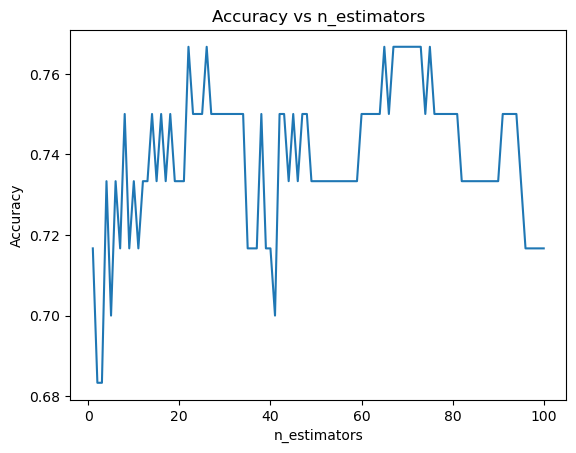

In [30]:
    n_estimators_list = list(range(1, 101))
    scores_list = []

    for n in n_estimators_list:
        rf = RandomForestClassifier(n_estimators=n, random_state=42)
        rf.fit(x_train, y_train)
        score = rf.score(x_test, y_test)
        scores_list.append(score)

    best_n_estimators=np.argmax(scores_list)+1
    print("En uygun n_estimators değeri:", best_n_estimators)

    plt.plot(n_estimators_list, scores_list)
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs n_estimators')
    plt.show()

In [31]:
    rf = RandomForestClassifier(n_estimators=22, random_state=42)
    rf.fit(x_train, y_train)
    print("accuracy of random forest:",rf.score(x_test,y_test))

accuracy of random forest: 0.7666666666666667


In [32]:
    from sklearn.model_selection import cross_val_score

En uygun cv değeri: 4


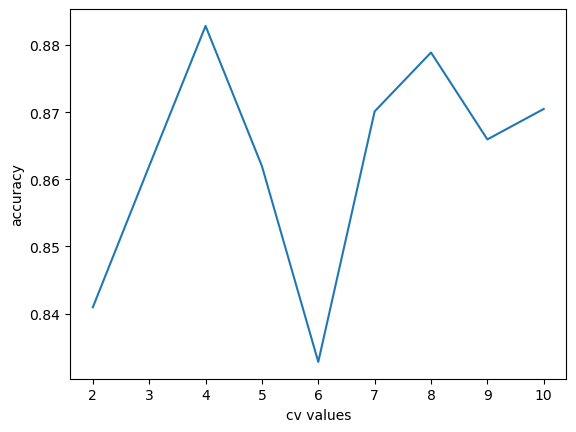

In [33]:
    # k fold cross validation with Random Forest
    
    score_list = []
    for cv in range(2, 11):
        rf_tuning =RandomForestClassifier(n_estimators=22, random_state=42)
        accuracies = cross_val_score(estimator=rf_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
    best_cv = np.argmax(score_list) + 2
    print("En uygun cv değeri:", best_cv)
    
    plt.plot(range(2,11),score_list)
    plt.xlabel("cv values")
    plt.ylabel("accuracy")
    plt.show()

In [34]:
    accuracies = cross_val_score(rf_tuning, X=x_train,y=y_train, cv=4)
    accuracies

array([0.86666667, 0.9       , 0.88333333, 0.88135593])

In [35]:
    accuracies = cross_val_score(rf_tuning, X=x_train,y=y_train, cv=4)
    print("mean_accuracy:", np.mean(accuracies))
    print("mean_std:",np.std(accuracies))
    rf_tuning.fit(x_train,y_train)
    print("test accuracy:",rf_tuning.score(x_test,y_test))

mean_accuracy: 0.8828389830508474
mean_std: 0.011816176856084647
test accuracy: 0.7666666666666667


In [36]:
    def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
    rf_accuracy = get_cross_validation_accuracy(rf_tuning, x_train, y_train, cv=4)
    print("Cross-validation doğruluk skoru:", rf_accuracy)


Cross-validation doğruluk skoru: 0.8828389830508474


## Support Vector Machine Classification (SVC)

In [37]:
    from sklearn.svm import SVC

In [38]:
    linear_svm=SVC(kernel="linear")
    linear_svm.fit(x_train,y_train)
    print("accuracy of linear SVC:",linear_svm.score(x_test,y_test))

accuracy of linear SVC: 0.75


In [39]:
    rbf_svm=SVC(kernel="rbf")
    rbf_svm.fit(x_train,y_train)
    print("accuracy of rbf SVC:",rbf_svm.score(x_test,y_test))

accuracy of rbf SVC: 0.7


In [40]:
    poly_svm=SVC(kernel="poly")
    poly_svm.fit(x_train,y_train)
    print("accuracy of polynimial SVC:",poly_svm.score(x_test,y_test))

accuracy of polynimial SVC: 0.7166666666666667


In [41]:
    svm=linear_svm

In [42]:
    from sklearn.model_selection import cross_val_score

En uygun cv değeri: 5


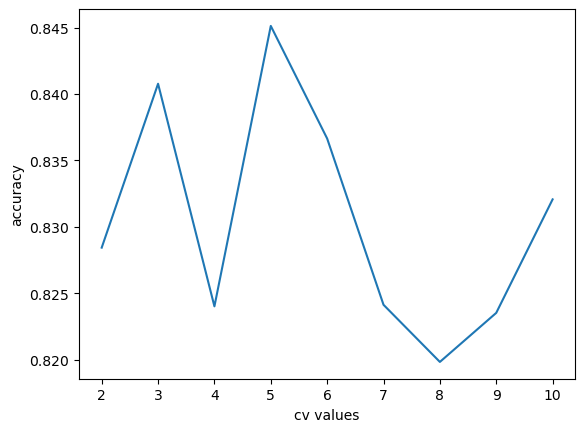

In [43]:
    # k fold cross validation with SVC
    
    score_list = []
    for cv in range(2, 11):
        svm_tuning =SVC(kernel="linear")
        accuracies = cross_val_score(estimator=svm_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
    best_cv = np.argmax(score_list) + 2
    print("En uygun cv değeri:", best_cv)
    
    plt.plot(range(2,11),score_list)
    plt.xlabel("cv values")
    plt.ylabel("accuracy")
    plt.show()

In [44]:
    accuracies = cross_val_score(svm_tuning, X=x_train,y=y_train, cv=5)
    accuracies

array([0.875     , 0.8125    , 0.89583333, 0.8125    , 0.82978723])

In [45]:
    accuracies = cross_val_score(svm_tuning, X=x_train,y=y_train, cv=5)
    print("mean_accuracy:", np.mean(accuracies))
    print("mean_std:",np.std(accuracies))
    svm_tuning.fit(x_train,y_train)
    print("test accuracy:",svm_tuning.score(x_test,y_test))

mean_accuracy: 0.8451241134751774
mean_std: 0.03414053018065253
test accuracy: 0.75


In [46]:
    def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
    svm_accuracy = get_cross_validation_accuracy(svm_tuning, x_train, y_train, cv=5)
    print("Cross-validation doğruluk skoru:", svm_accuracy)


Cross-validation doğruluk skoru: 0.8451241134751774


## Logistic Regression Classification

In [47]:
    from sklearn.linear_model import LogisticRegression

In [48]:
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    print("accuracy of logistic regression:",lr.score(x_test,y_test))

accuracy of logistic regression: 0.7166666666666667


In [49]:
    from sklearn.model_selection import cross_val_score

En uygun cv değeri: 10


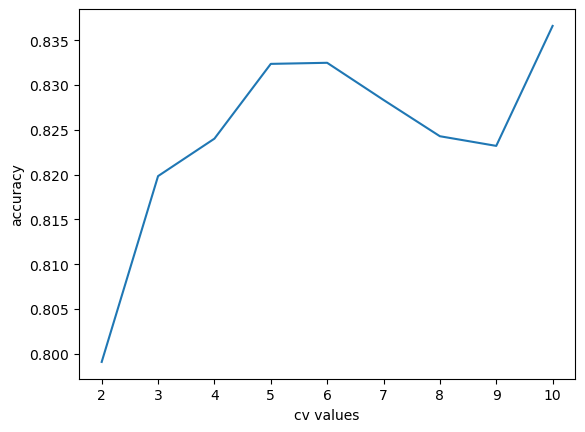

In [50]:
    # k fold cross validation with LR
    
    score_list = []
    for cv in range(2, 11):
        lr_tuning =LogisticRegression()
        accuracies = cross_val_score(estimator=lr_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
    best_cv = np.argmax(score_list) + 2
    print("En uygun cv değeri:", best_cv)
    
    plt.plot(range(2,11),score_list)
    plt.xlabel("cv values")
    plt.ylabel("accuracy")
    plt.show()

In [51]:
    accuracies = cross_val_score(lr_tuning, X=x_train,y=y_train, cv=10)
    accuracies

array([0.79166667, 0.95833333, 0.875     , 0.79166667, 0.91666667,
       0.91666667, 0.875     , 0.66666667, 0.79166667, 0.7826087 ])

In [52]:
    accuracies = cross_val_score(lr_tuning, X=x_train,y=y_train, cv=10)
    print("mean_accuracy:", np.mean(accuracies))
    print("mean_std:",np.std(accuracies))
    lr_tuning.fit(x_train,y_train)
    print("test accuracy:",lr_tuning.score(x_test,y_test))

mean_accuracy: 0.8365942028985508
mean_std: 0.08272779362880019
test accuracy: 0.7166666666666667


In [53]:
    def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
    lr_accuracy = get_cross_validation_accuracy(lr_tuning, x_train, y_train, cv=10)
    print("Cross-validation doğruluk skoru:", lr_accuracy)


Cross-validation doğruluk skoru: 0.8365942028985508


## Naive Bayes Classification

In [54]:
    from sklearn.naive_bayes import GaussianNB

In [55]:
    nb=GaussianNB()
    nb.fit(x_train,y_train)
    print("accuracy of naive bayes:",nb.score(x_test,y_test))

accuracy of naive bayes: 0.7


In [56]:
    from sklearn.model_selection import cross_val_score

En uygun cv değeri: 8


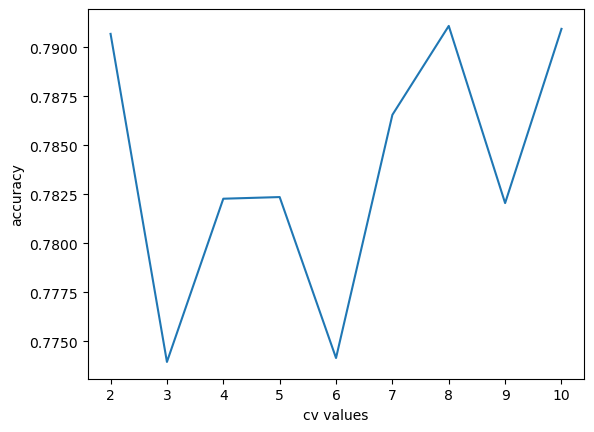

In [57]:
    # k fold cross validation with naive bayes
    
    score_list = []
    for cv in range(2, 11):
        nb_tuning =GaussianNB()
        accuracies = cross_val_score(estimator=nb_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
    best_cv = np.argmax(score_list) + 2
    print("En uygun cv değeri:", best_cv)
    
    plt.plot(range(2,11),score_list)
    plt.xlabel("cv values")
    plt.ylabel("accuracy")
    plt.show()

In [58]:
    accuracies = cross_val_score(nb_tuning, X=x_train,y=y_train, cv=8)
    accuracies

array([0.76666667, 0.8       , 0.73333333, 0.9       , 0.76666667,
       0.8       , 0.7       , 0.86206897])

In [59]:
    accuracies = cross_val_score(nb_tuning, X=x_train,y=y_train, cv=8)
    print("mean_accuracy:", np.mean(accuracies))
    print("mean_std:",np.std(accuracies))
    nb_tuning.fit(x_train,y_train)
    print("test accuracy:",nb_tuning.score(x_test,y_test))

mean_accuracy: 0.7910919540229886
mean_std: 0.061119142748015914
test accuracy: 0.7


In [60]:
    def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
    nb_accuracy = get_cross_validation_accuracy(nb_tuning, x_train, y_train, cv=8)
    print("Cross-validation doğruluk skoru:", nb_accuracy)


Cross-validation doğruluk skoru: 0.7910919540229886


## Comparison of Models

In [61]:
    from sklearn.metrics import accuracy_score

In [62]:

    modeller = [
    (knn,8),
    (rf,4),
    (svm,5),
    (lr,10),
    (nb,8)
]

    for model,cv in modeller:
        isimler = model.__class__.__name__
        cv_scores = cross_val_score(model, x_train, y_train, cv=cv)
        mean_accuracy = np.mean(cv_scores)
        print("-" * 28)
        print(isimler + ":")
        print("Cross-Validation (CV={}) Ortalama Doğruluk: {:.4%}".format(cv,mean_accuracy))
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        dogruluk = accuracy_score(y_test, y_pred)
        print("Accuracy: {:.4%}".format(dogruluk))


----------------------------
KNeighborsClassifier:
Cross-Validation (CV=8) Ortalama Doğruluk: 71.5517%
Accuracy: 68.3333%
----------------------------
RandomForestClassifier:
Cross-Validation (CV=4) Ortalama Doğruluk: 88.2839%
Accuracy: 76.6667%
----------------------------
SVC:
Cross-Validation (CV=5) Ortalama Doğruluk: 84.5124%
Accuracy: 75.0000%
----------------------------
LogisticRegression:
Cross-Validation (CV=10) Ortalama Doğruluk: 83.6594%
Accuracy: 71.6667%
----------------------------
GaussianNB:
Cross-Validation (CV=8) Ortalama Doğruluk: 79.1092%
Accuracy: 70.0000%


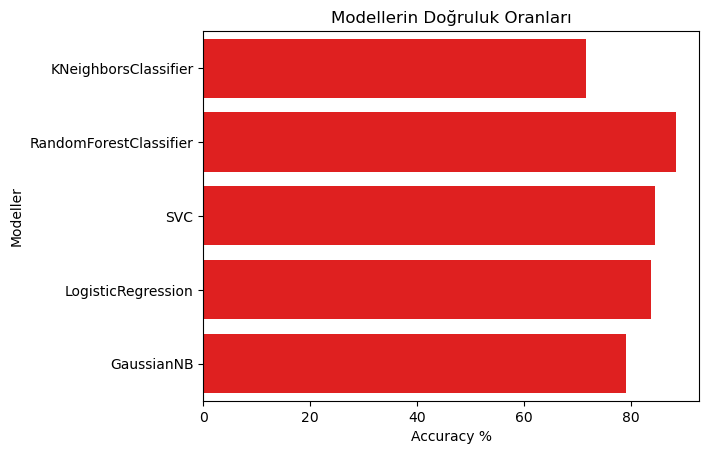

In [63]:
    sonuc=[]
    sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

    for model,cv in modeller:
        isimler = model.__class__.__name__
        cv_scores = cross_val_score(model, x_train, y_train, cv=cv)
        mean_accuracy = np.mean(cv_scores)
        
        sonuc = pd.DataFrame([[isimler, mean_accuracy*100]], columns= ["Modeller","Accuracy"])
        sonuclar = sonuclar.append(sonuc)
            
    sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
    plt.xlabel('Accuracy %')
    plt.title('Modellerin Doğruluk Oranları')
    plt.show()

## Confusion Matrix

In [64]:
    y_pred_knn=knn.predict(x_test)
    y_true_knn=y_test

In [65]:
    y_pred_rf=rf.predict(x_test)
    y_true_rf=y_test

In [66]:
    y_pred_svm=svm.predict(x_test)
    y_true_svm=y_test

In [67]:
    y_pred_lr=lr.predict(x_test)
    y_true_lr=y_test

In [68]:
    y_pred_nb=nb.predict(x_test)
    y_true_nb=y_test

In [69]:
    #confusion matrix 
    
    from sklearn.metrics import confusion_matrix

In [70]:
    cm_knn=confusion_matrix(y_true_knn,y_pred_knn)
    cm_rf=confusion_matrix(y_true_rf,y_pred_rf)
    cm_svm=confusion_matrix(y_true_svm,y_pred_svm)
    cm_lr=confusion_matrix(y_true_lr,y_pred_lr)
    cm_nb=confusion_matrix(y_true_nb,y_pred_nb)

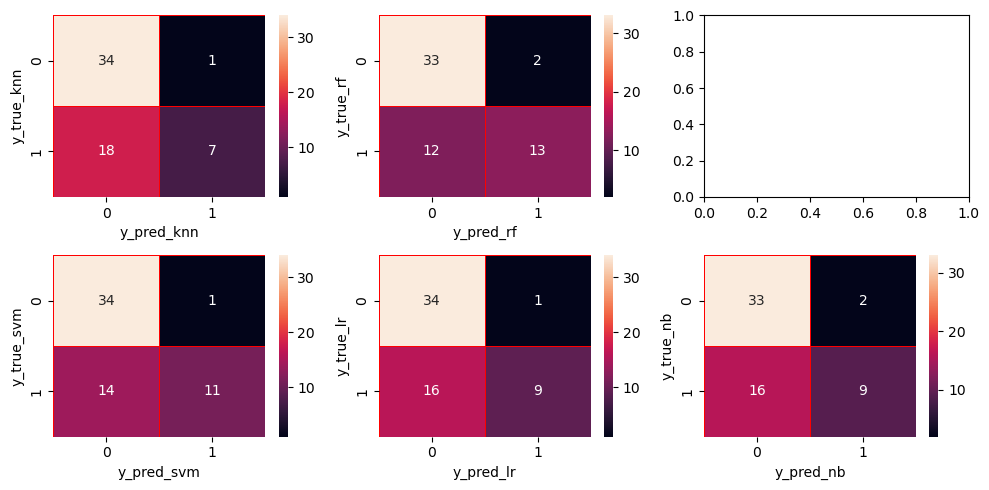

In [71]:
    fig, axes = plt.subplots(2,3, figsize=(10,5))

    sns.heatmap(cm_knn, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[0, 0])
    axes[0, 0].set_xlabel("y_pred_knn")
    axes[0, 0].set_ylabel("y_true_knn")

    sns.heatmap(cm_rf, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[0, 1])
    axes[0, 1].set_xlabel("y_pred_rf")
    axes[0, 1].set_ylabel("y_true_rf")
    

    sns.heatmap(cm_svm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1, 0])
    axes[1, 0].set_xlabel("y_pred_svm")
    axes[1, 0].set_ylabel("y_true_svm")

    sns.heatmap(cm_lr, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1, 1])
    axes[1, 1].set_xlabel("y_pred_lr")
    axes[1, 1].set_ylabel("y_true_lr")
    
    sns.heatmap(cm_nb, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1,2])
    axes[1,2].set_xlabel("y_pred_nb")
    axes[1,2].set_ylabel("y_true_nb")
    

    plt.tight_layout()
    plt.show()